# CE888 Assignment 1

This code is written as part of requirments of CE888 Data Science and Decision Making for Task 1 of Project 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 16 February 2019<br> 

In [1]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import original libraries
import load_human_activity as HUMAN
import load_phishing as PHS
import load_spam as SPAM

## 1. Load Data

Load data from **data** directory.<br>
Reading and preprocessing data into pandas.DataFrame are done by respective python files.<br>
The following variables are obtained in the following sections:<br>

| name | type | description |
|------|------|-------------|
|col_names|List|Name of the columns (including target column)|
|features_df|DataFrame|Feature values|
|targets_df|DataFrame|Target values|
|data_df|DataFrame|The whole data containing both features and targets|

In [2]:
def timestamp():
    from time import gmtime, strftime
    
    timestamp = strftime("%Y%m%d_%H%M%S", gmtime())
    
    return timestamp

In [18]:
def load_data(data_id):
    # human activity
    def load_human_activity():
        pic_file = "human_%s" %  timestamp()

        col_names = HUMAN.get_column_names("../data/human_activity/features.txt")
        features_df = HUMAN.get_features("../data/human_activity/train/X_train.txt")
        targets_df = HUMAN.get_targets("../data/human_activity/train/y_train.txt")

        # concatenate the dataframes
        data_df = pd.concat ([features_df, targets_df], axis = 1)

        # replace default column names with feature names
        data_df.columns = col_names

        # replace string representations into numeric values
        data_df = data_df.convert_objects(convert_numeric=True)

        return col_names, features_df, targets_df, data_df, pic_file

    # spam
    def load_spam():
        pic_file = "spam_%s" %  timestamp()
        col_names = SPAM.get_col_names("../data/spam/spambase.names")
        features_df, targets_df, data_df = \
            SPAM.get_data("../data/spam/spambase.data", col_names)
        
        return col_names, features_df, targets_df, data_df, pic_file
        
    # phishing
    def load_phishing():
        pic_file = "phishing_%s" %  timestamp()
        col_names, fetures_df, targets_df, data_df = \
            PHS.get_data("../data/phishing/Training Dataset.txt")

        return col_names, features_df, targets_df, data_df, pic_file

    if data_id == 0:
        return load_human_activity()
    elif data_id == 1:
        return load_spam()
    elif data_id == 2:
        return load_phishing()

#### Select data to load
> 0. Human Activity
1. Spam
2. Phishing
>

In [50]:
col_names, features_df, targets_df, data_df, pic_file = load_data(data_id=1)
data_df.head(5)

/Users/tomoko/Documents/04_MSc/2_Modules/CE888-7-SP Data Science And Decision Making/03_Assignment/03_Deliverables/ce888assignment/src/load_spam.py:71: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data_df = data_df.convert_objects(convert_numeric=True)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 2. Inspect the Data
### 2-1. General

#### (1) Null values

In [51]:
count_nan = data_df.isnull().values.sum()
print("Number of NaN: %d" % count_nan)

if data_df.isnull().values.sum() != 0:
    print ("Count NaN in rows:\n", data_df.isnull().sum(axis=1))
    print ("Count NaN in columns:\n", data_df.isnull().sum())

Number of NaN: 0


#### (2) Data shape

In [52]:
data_df.shape

(4601, 58)

#### (3) Class labels

In [53]:
features_np = features_df.values
targets_np = targets_df.values

In [54]:
unique_labels = np.unique(targets_np)
unique_labels = np.sort(unique_labels)
unique_labels

array([0, 1])

### 3-2. Distribution
#### (1) Histogram

In [39]:
def histogram(data_df):
    num_cols = len(data_df.columns)

    # convert DataFrame to numpy array
    data = data_df.values

    # define figure grid
    if num_cols < 6: row, col = 1, num_cols
    else: row, col = num_cols//5+1, 5

    # create figure object
    fig = plt.figure(figsize = (col*5, row*3))
    
    # plot data
    for i in range(num_cols):
        plt.subplot (row, col, i+1)
        plt.title (data_df.columns[i])
        sns.distplot(data_df[data_df.columns[i]].values, kde=False, rug=False)
    
    plt.savefig("../output/hitgram_%s.png" % pic_file ,bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

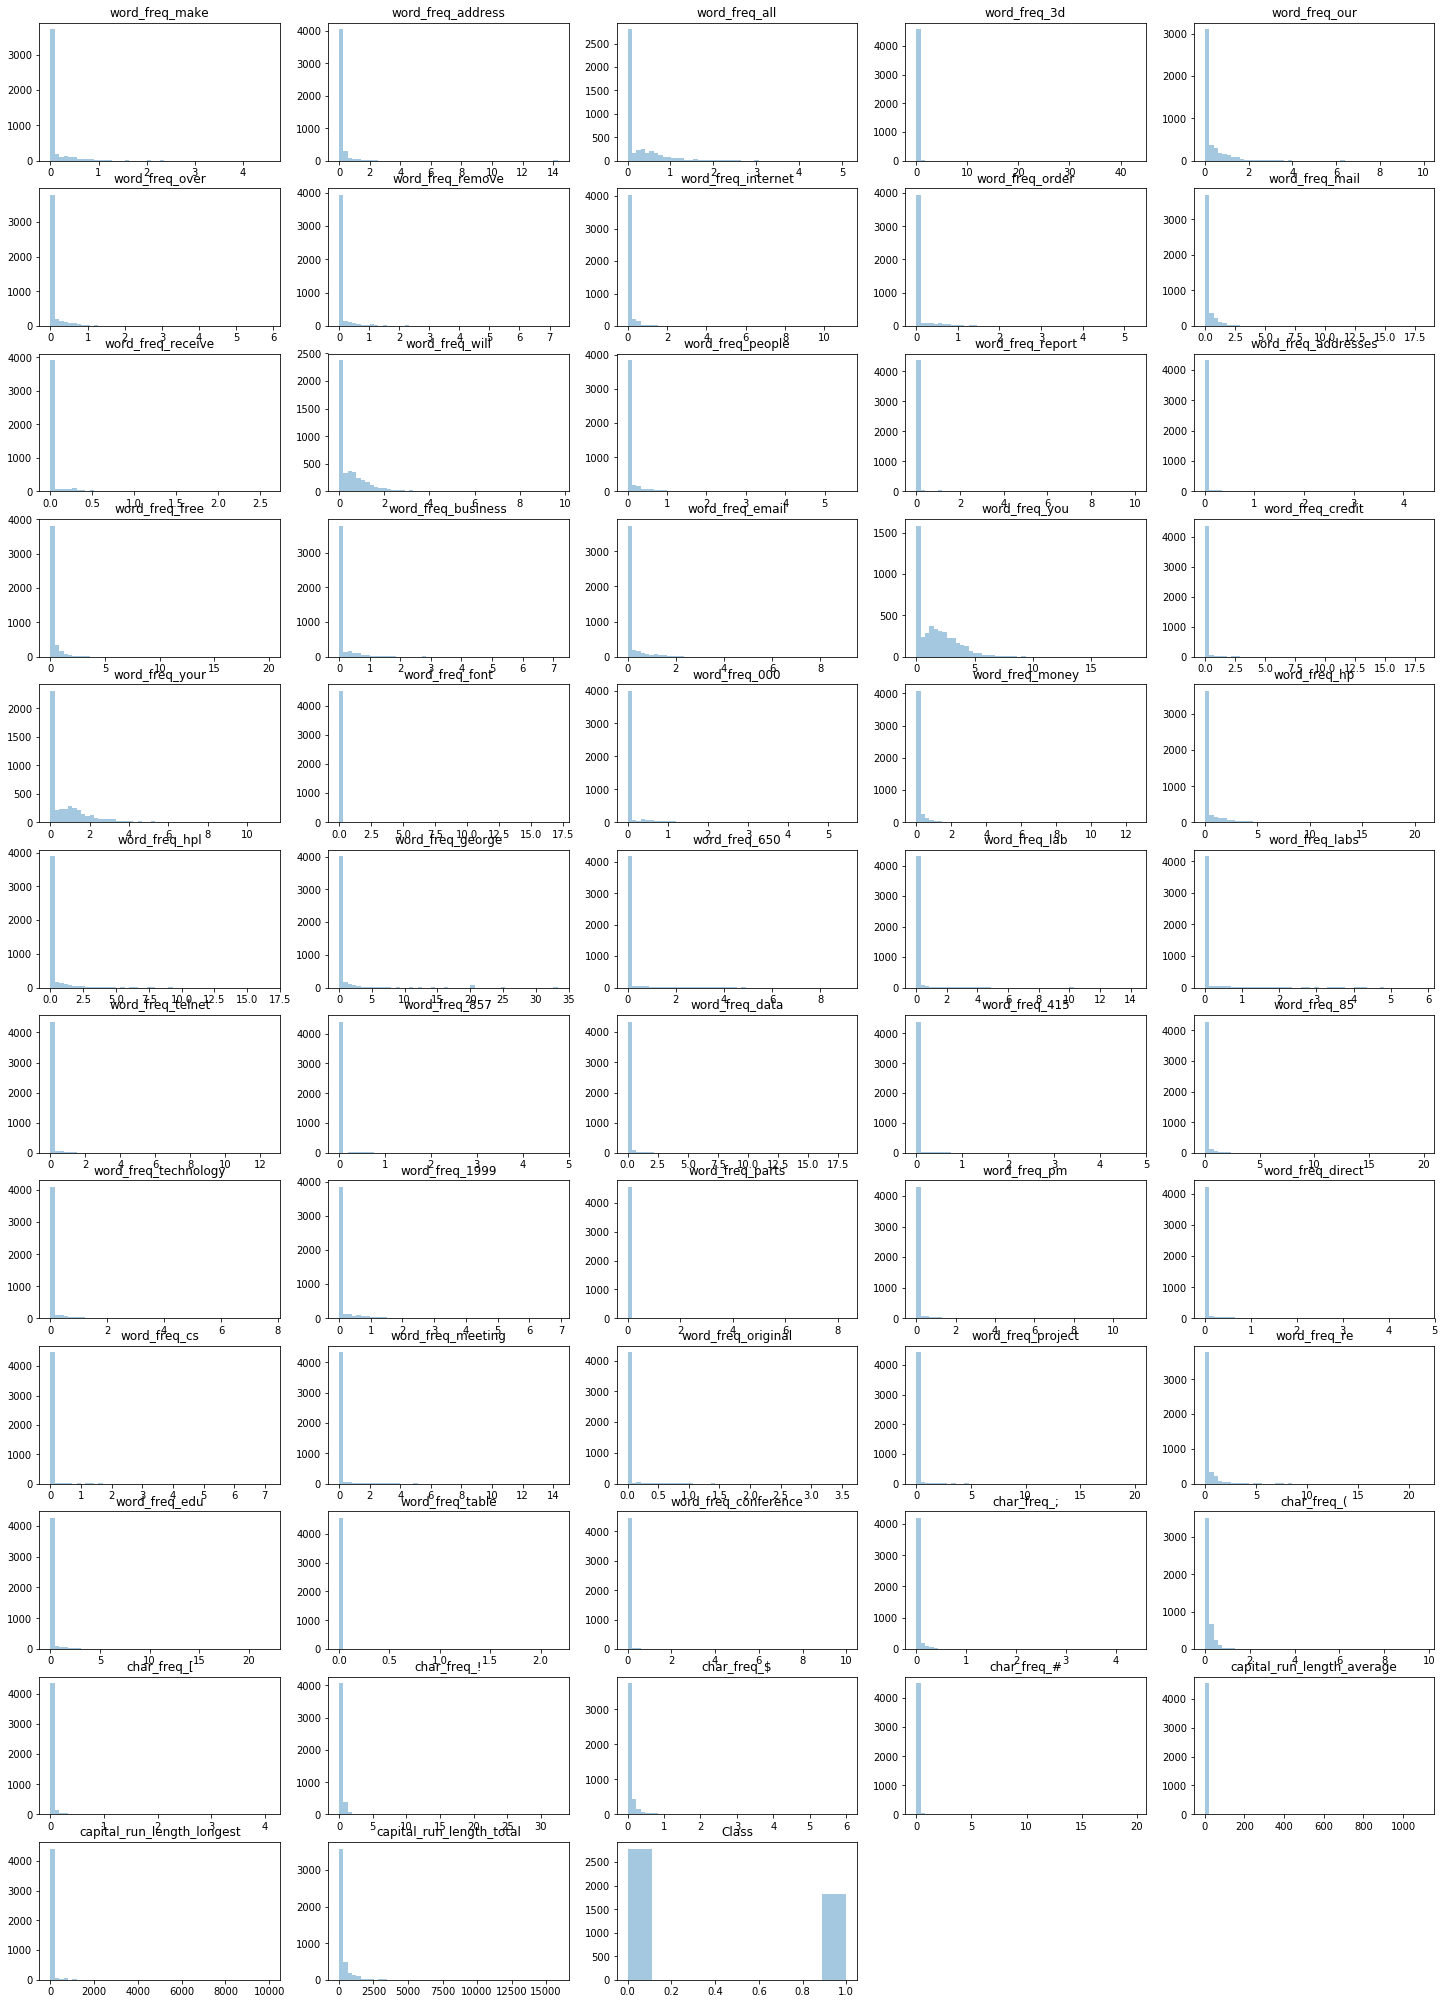

In [40]:
histogram(data_df)        

#### (2) Correlation coefficient

In [ ]:
def cr_heatmap(data_np, labels):
    size = len(labels) * 0.5
    fig = plt.figure(figsize = (size, size))
    hm = sns.heatmap(data_np, cbar = True, annot = True, square = True, 
                     fmt = '.2f', annot_kws = {'size': 8},
                     yticklabels = labels,
                     xticklabels = labels)
    plt.show ()
    
    fig.savefig("../output/crrel_hm_%s.png" % pic_file, bbox_inches='tight')

In [ ]:
# generate a correlation coefficient matrix
cr = np.corrcoef (data_df.values.T)

In [ ]:
# show a heatmap
cr_heatmap(cr, col_names)

In [ ]:
def cr_bar_graph (data_np, names):
    size_h = len (data_np)*0.5
    size_v = size_h * 0.5
    
    fig = plt.figure (figsize = (size_h, size_v))
    index = np.arange (len (data_np))
    plt.bar(index, data_np)
    plt.title ("Correlation Coefficient with the Label", fontsize = 10)
    plt.xlabel("Features", fontsize = 10)
    plt.xticks(index, names, fontsize = 10, rotation = 90)
    plt.show ()
    
    fig.savefig("../output/crrel_bar_%s.png" % pic_file, bbox_inches='tight')

In [ ]:
top = 20
cr_with_labels = cr[-1][:-1]

# sort absolute correlation coefficience
indices = np.argsort(abs(cr_with_labels))[::-1]

# show a bar graph
cr_bar_graph (cr_with_labels[indices [:top]], np.array(col_names)[indices [:top]])

### 3-3. Feature Importance

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

clf = ExtraTreesClassifier()
#clf = GaussianNB()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


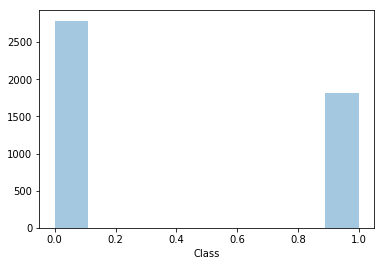

In [61]:
%matplotlib inline
sns.distplot(data_df['Class'], kde=False)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
# split data into training and test datasets
X_train, X_test, y_train, y_test = \
    train_test_split(features_df, targets_df, test_size=0.3)

# training
clf.fit(X_train, y_train)

# make aprediction with the remaining 500 rows
p = clf.predict(X_test)

# show the results
#print ("Results:", p)
print ("Accuracy:", accuracy_score (y_test, p))
print ("Confusion_Matrix:")
print (pd.DataFrame (confusion_matrix(y_test, p)))

Accuracy: 0.9558291093410572
Confusion_Matrix:
     0    1
0  805   22
1   39  515


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "%d"%(cm[i, j])
        #print t
        plt.text(j, i, t,horizontalalignment="center",\
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig("../output/conf_matrix_%s.png" % pic_file, bbox_inches='tight')

Confusion matrix, without normalization


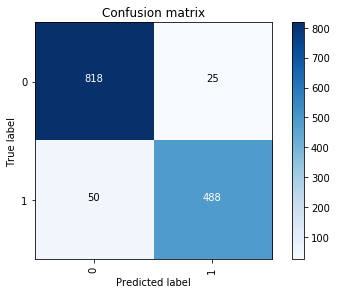

In [59]:
cnf_matrix = confusion_matrix(y_test, p)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize = False,
                      title='Confusion matrix')

Feature ranking:


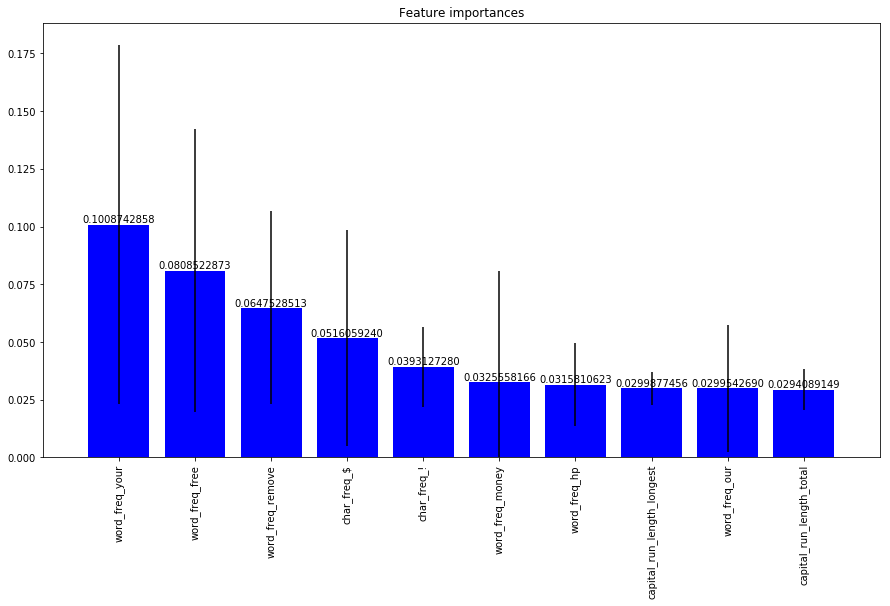

In [46]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
#print(indices)
# Print the feature ranking
print("Feature ranking:")

#for f in range(len(feature_names)-1):
    #print("%d. %s (%f)" % (f + 1, feature_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="b", yerr=std[indices[:num_feat_to_plot]], align="center")


for x, y in zip(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]]):
    plt.text(x, y, "%.10f" % y, ha='center', va='bottom')
    
plt.xticks(range(num_feat_to_plot), np.array(col_names)[indices[:num_feat_to_plot]], rotation = 90)
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

fig.savefig("../output/importance_%s.png" % pic_file, bbox_inches='tight')